In [ ]:
import pandas as pd
import sys
import numpy as np
from matplotlib import pyplot as plot
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/for_train.txt", sep="\t", header=None, names=["text", "rephrase"])
print(df1.head())
df = df1


                                                text  \
0  You may be stressed out, but your body doesn't...   
1  Arghhh can't stand when tan goes patchy then i...   
2  M4&M49 were bloody horrendous. Finally found m...   
3  Life is just hard and harder when difficult pe...   
4  I realize you're all trying to help me, but it...   

                                            rephrase  
0  I will be able to go through stress because I ...  
1  Tanning can sometimes have unexpected results ...  
2  Even though I am facing a hard time at least I...  
3  Keep difficult people out of your life or you'...  
4  I am happy to have people who care about me an...  


In [ ]:
len(df)
#all_texts = df["text"] + df["rephrase"]
all_texts = df["text"]
all_texts =all_texts.append(df["rephrase"])

<ipython-input-6-2aa0f4d9e1b8>:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_texts =all_texts.append(df["rephrase"])


In [ ]:
len(all_texts)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_texts)
sequences = tokenizer.texts_to_sequences(all_texts)
max_seq_length = max(len(seq) for seq in sequences)
print(max_seq_length)

59


In [ ]:
corpus_vec = []
def getVectors(dataset):

    for sentence in dataset:
        sent_vector = []
        count = 0;
        for word in sentence:
            count = count + 1;
            if (word in glove):
                vector = glove[word];
                sent_vector.append(np.array(vector))
        print("word", count)
        print(len(sent_vector))
        corpus_vec.append(sent_vector)
    return corpus_vec

In [ ]:
cleaned_text = np.array(df['text'])
cleaned_rephrase= np.array(df['rephrase'])


short_text = []
short_summary = []

# filters out articles and summaries that are too long. this is where improvement
# could be made to include longer articles and just cut them off
for i in range(len(cleaned_text)):
    if len(cleaned_rephrase[i].split()) <= max_seq_length and len(cleaned_text[i].split()) <= max_seq_length:
        short_text.append(cleaned_text[i])
        short_summary.append(cleaned_rephrase[i])

post_pre = pd.DataFrame({'text': short_text,'rephrase': short_summary})

# Add tokens labeled 'rbegin' and 'rend' to guide autoencoder through its
# summery generation
post_pre['rephrase'] = post_pre['rephrase'].apply(lambda x: 'rbegin ' + x + ' rend')

post_pre.head(5)

In [ ]:
tokenizer = Tokenizer()
all_texts1 = post_pre["text"]
all_texts1 =all_texts1.append(post_pre["rephrase"])
tokenizer.fit_on_texts(all_texts1)
sequences = tokenizer.texts_to_sequences(all_texts1)
max_seq_length = max(len(seq) for seq in sequences)
print(max_seq_length)

In [ ]:
from sklearn.model_selection import train_test_split

x_tr, x_val, y_tr, y_val = train_test_split(
    np.array(post_pre["text"]),
    np.array(post_pre["rephrase"]),
    test_size=0.2,
    random_state=0,
    shuffle=True,
)
x_tr = getVectors(x_tr[:5])

word 259
190
word 127
98
word 189
153
word 111
81
word 92
74


In [ ]:
te = post_pre["text"]
print(len(te[0]))

113


In [ ]:

x_val = getVectors(x_val)
y_tr = getVectors(y_tr)

In [ ]:
y_val = getVectors(y_val)

In [ ]:
print(len(x_tr[3]))
temp = np.array(x_tr[:3])
y = padding1(temp)
len(y[0])
len(y[1])

81


<ipython-input-155-aa4c41436d0b>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  temp = np.array(x_tr[:3])


98

In [ ]:
x_tr2

AttributeError: ignored

In [ ]:
x_tr = pad_sequences(x_tr,  maxlen=max_seq_length, padding='post')
x_val = pad_sequences(x_val, maxlen=max_seq_length, padding='post')

In [ ]:
x_tr[0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [ ]:
text_sent_length = []
x_word_set = []
rephrase_sent_length = []
y_word_set = []
for i in df['text']:
      text_sent_length.append(len(i.split()))
      x_word_set.extend(i.split())
for j in df['rephrase']:
      rephrase_sent_length.append(len(j.split()))
      y_word_set.extend(j.split())

In [ ]:
x_vocab = pd.Series(x_word_set).drop_duplicates().tolist()
y_vocab = pd.Series(y_word_set).drop_duplicates().tolist()
print(len(x_vocab))

6827


In [ ]:
x_tokenizer = Tokenizer(num_words = len(x_vocab))
x_tokenizer.fit_on_texts(list(x_tr))

In [ ]:
print(len(y_vocab))

4485


In [ ]:
x_tr_seq = x_tokenizer.texts_to_sequences(x_tr)
x_val_seq = x_tokenizer.texts_to_sequences(x_val)

In [ ]:
x_tr = pad_sequences(x_tr_seq,  maxlen=max_seq_length, padding='post')
x_val = pad_sequences(x_val_seq, maxlen=max_seq_length, padding='post')

In [ ]:
x_voc = x_tokenizer.num_words + 1

In [ ]:
x_voc

6828

In [ ]:
y_tokenizer = Tokenizer(num_words=len(y_vocab))
y_tokenizer.fit_on_texts(list(y_tr))

y_tr_seq = y_tokenizer.texts_to_sequences(y_tr)
y_val_seq = y_tokenizer.texts_to_sequences(y_val)

y_tr = pad_sequences(y_tr_seq, maxlen=max_seq_length, padding='post')
y_val = pad_sequences(y_val_seq, maxlen=max_seq_length, padding='post')


y_voc = y_tokenizer.num_words + 1

In [ ]:
y_voc

4486

In [ ]:
from keras.callbacks import LambdaCallback
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers import Input, Embedding, TimeDistributed, RepeatVector, Concatenate
from keras.models import Model
import gensim.downloader
glove = gensim.downloader.load('glove-twitter-200')

In [ ]:
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, embedding_dim))
for word, i in tokenizer.word_index.items():
    if word in glove:
      embedding_vector = glove[word]
      if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
length = len(tokenizer.word_index) + 1

In [ ]:
length

4474

In [ ]:

encoder_input = Input(shape=(max_seq_length,))
encoder_embedding = Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, weights=[embedding_matrix], trainable=False)(encoder_input)
encoder_lstm, state_h, state_c = LSTM(100, return_state=True, dropout=0.5, recurrent_dropout=0.5)(encoder_embedding)
encoder_states = [state_h, state_c]


decoder_input = Input(shape=(None,))
decoder_embedding = Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, weights=[embedding_matrix], trainable=False)(decoder_input)
decoder_lstm = LSTM(100, return_sequences=True, return_state=True, dropout=0.5, recurrent_dropout=0.5)
decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=encoder_states)
decoder_dense = Dense(len(tokenizer.word_index) + 1, activation='relu')
decoder_outputs = decoder_dense(decoder_outputs)



# Build the full model

model = Model([encoder_input, decoder_input], decoder_outputs)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
#model.fit(x_tr, y_tr, epochs=10, verbose=0)
history = model.fit([x_tr, y_tr], y_tr, epochs=3, batch_size=128, verbose=1)






In [ ]:
# encoder inference
encoder_model = Model(inputs=encoder_input,outputs=[state_h, state_c])

# decoder inference
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_seq_length,latent_dim))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
# Get the embeddings of the decoder sequence
#dec_emb2= decoder_embedding(decoder_input)

# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(decoder_embedding, initial_state=decoder_states_inputs)

#attention inference
#attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
#decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs3 = decoder_dense(decoder_outputs2)

# Final decoder model
decoder_model = Model(
[decoder_input] + decoder_states_inputs,
[decoder_outputs3] + [state_h2, state_c2])
decoder_model.summary()

In [ ]:
model.input[0]

<KerasTensor: shape=(None, 59) dtype=float32 (created by layer 'input_6')>

In [ ]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq)
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1, 1))

    # Populate the first character of target sequence with the start character.
    target_seq[0, 0] = tokenizer.word_index['rbegin']  # Use the start token index
    # Sampling loop for a batch of sequences
    stop_condition = False
    decoded_sentence = ''

    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_word = " "
        for word, index in tokenizer.word_index.items():
            if index == sampled_token_index:
                sampled_word = word
                break

        #if sampled_word is not None:
        decoded_sentence += ' ' + sampled_word

        # Exit condition: either hit max length or find stop character.
        if sampled_word == 'rend' or len(decoded_sentence.split()) >= max_seq_length:
          stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1, 1))
        target_seq[0, 0] = sampled_token_index

        # Update states
        states_value = [h, c]

    return decoded_sentence

In [ ]:
input_text = "I dislike this product."
input_sequence = tokenizer.texts_to_sequences([input_text])

padded_input_sequence = pad_sequences(input_sequence, maxlen=max_seq_length, padding='post')

style_transferred_text = decode_sequence(padded_input_sequence)
style_transferred_text
#tokenizer.word_index['rbegin']


In [ ]:
style_transferred_text

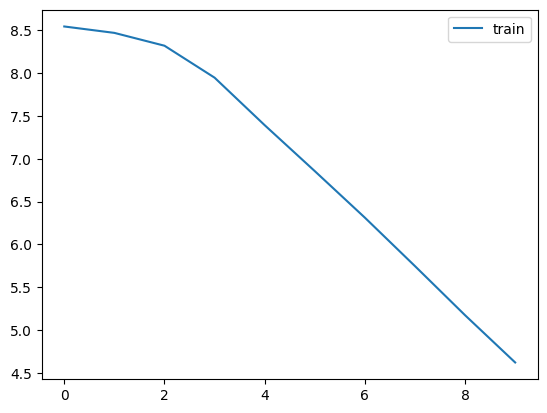

In [ ]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
#pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:

# mapping back from the outputted summary in tokenized form to word form
reverse_target_word_index = y_tokenizer.index_word
reverse_source_word_index = x_tokenizer.index_word
target_word_index = y_tokenizer.word_index

In [ ]:
def seq2rephrase(input_seq):
    newString=''
    for i in input_seq:
      if((i!=0 and i!=target_word_index['rbegin']) and i!=target_word_index['rend']):
        newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
      if(i!=0):
        newString=newString+reverse_source_word_index[i]+' '
    return newString


In [ ]:
for i in range(25, 26):
  print(i)
  print("Review:",seq2text(x_tr[i]))
  print("Original rephrase:",seq2rephrase(y_tr[i]))
  print("Predicted rephrase:",decode_sequence(x_tr[i].reshape(1,max_seq_length)))
  print("\n")